In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
# Import the needed sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import keras
import numpy as np
from tensorflow.keras.layers import concatenate
from sklearn.metrics import classification_report
from PIL import Image
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , confusion_matrix






/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.

In [2]:
def visualize(path):

    data = pd.read_csv(path)
    data = pd.DataFrame(data)
    data = data.dropna()
    print(data.head())# train
    print(data[["Type","Name","Age","Breed1","Breed2","Gender","Color1","Color2","Color3","MaturitySize","FurLength","Vaccinated","Dewormed","Sterilized","Health","Quantity","Fee","State","RescuerID","VideoAmt","PhotoAmt","PetID"]].describe())
   

    data['AdoptionSpeed'].value_counts().plot.bar()
    plt.title('Class lable distrbution')
    print("We have class imbalnce") #######
    

    n_bins = 10

    fig, ((ax0, ax1), (ax2, ax3),(ax4, ax5)) = plt.subplots(nrows=3, ncols=2,figsize=(12,12))

    #here we have our continous attributes 
    x = data['Age']
    ax0.hist(x,range=[0, 150], color = 'orange', edgecolor = 'black',
         bins = 10)
    ax0.legend(prop={'size': 10})
    ax0.set_title('Age')
    y = data['Fee']
    ax1.hist(y,range=[0,600], color = 'tan', edgecolor = 'black',
         bins = 10)
    ax1.set_title('Fee')
     
    z = data['Quantity']   
    ax2.hist(z,range=[0,30], color = 'lime', edgecolor = 'black',
         bins = 10)
    ax2.set_title('Quantity')

    n = data['VideoAmt']      
    ax3.hist(n,range=[0,30], color = 'pink', edgecolor = 'black',
         bins = 10)
    ax3.set_title('VideoAmt')
    
    m = data['PhotoAmt']      
    ax4.hist(m,range=[0,40], color = 'blue', edgecolor = 'black',
         bins = 10)
    ax4.set_title('PhotoAmt')
    
    ax5 = sns.heatmap(data.corr());
    ax5.set_title('Correlation heatmap')
    
    

    
     #add the dropped ones hist 


    fig.tight_layout()
    plt.show()
    
    data.drop('Name', inplace=True, axis=1)
    data.drop('RescuerID', inplace=True, axis=1)
    data.drop('VideoAmt', inplace=True, axis=1)
    data.drop('PhotoAmt', inplace=True, axis=1)
    data.drop('State', inplace=True, axis=1)
    
    return data


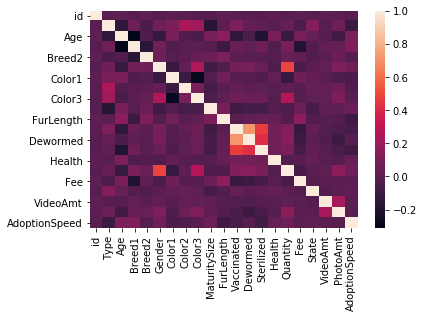

In [3]:
data = pd.read_csv("dataset.csv")
sns.heatmap(data.corr());
plt.show()

No handles with labels found to put in legend.


   id  Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0   0     2       Nibble    3     299       0       1       1       7       0   
1   1     2  No Name Yet    1     265       0       1       1       2       0   
2   2     1       Brisco    1     307       0       1       2       7       0   
3   3     1         Miko    4     307       0       2       1       2       0   
4   4     1       Hunter    1     307       0       1       1       0       0   

   ...  Sterilized  Health  Quantity  Fee  State  \
0  ...           2       1         1  100  41326   
1  ...           3       1         1    0  41401   
2  ...           2       1         1    0  41326   
3  ...           2       1         1  150  41401   
4  ...           2       1         1    0  41326   

                          RescuerID  VideoAmt      PetID  PhotoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0  86e1089a3         1   
1  3082c7125d8fb66f7dd4bff4192c8b14         0  6296e909a    

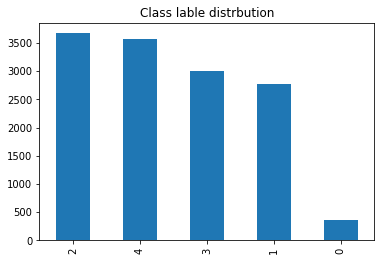

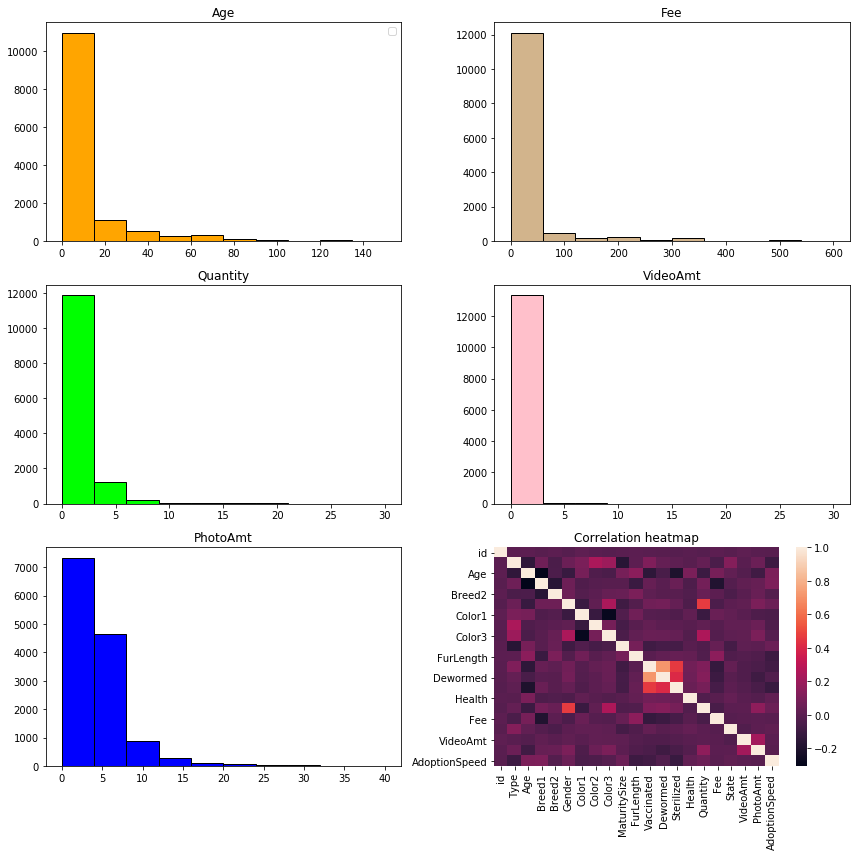

,id,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,PetID,AdoptionSpeed
0,0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,86e1089a3,2
1,1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,6296e909a,0
2,2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,3422e4906,3
3,3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,5842f1ff5,2
4,4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,850a43f90,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14574,14987,1,6,195,0,2,1,7,0,1,3,1,1,2,1,1,0,4d163b731,0
14576,14989,2,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,a01ab5b30,4
14577,14990,2,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,d981b6395,3
14578,14991,2,9,266,0,2,4,7,0,1,1,1,1,1,1,1,0,e4da1c9e4,4


In [4]:
visualize("dataset.csv")


In [5]:
# splitting data
def split(data):
    training_data = data.dropna()

    x = training_data.iloc[:, 1:18].values
    y = training_data.iloc[:, 18].values
    

    trainX, testX, trainY, testY= train_test_split(x, y, test_size=0.2, random_state=0)


    return trainX, testX, trainY, testY

In [6]:
def preprocess_image(data, path_to_images= 'Images'):

    # Split the images into training and testing sets following 80/20 partition
    
    train_X, test_X, train_y, test_Y = split(data)
    trainPet_ID = train_X[:, -1]
    print(trainPet_ID)

    testPet_ID = test_X[:, -1]
    print("test_X ",len(test_X))
    print("testPet_ID ",len(testPet_ID))

    


    # Load and resize images for training, then saving them into numpy array and return it from the method
    trainImages= np.zeros(shape=(len(trainPet_ID),32,32,3)) 

    counter = 0

    
    
    for i in range(len(trainPet_ID)):
        image = tf.keras.preprocessing.image.load_img(path_to_images+'/'+str(trainPet_ID[i])+"-1.jpg")
        image = image.resize((32,32), resample=0, box=None)
        trainImages[counter] = image
    

    # Load and resize images for testing, then saving them into numpy array and return it from the method
    testImages= np.zeros(shape=(len(testPet_ID),32,32,3)) 

    counter = 0 
    for i in range(len(testPet_ID)):
        image = tf.keras.preprocessing.image.load_img(path_to_images+'/'+str(testPet_ID[i])+"-1.jpg")
        image = image.resize((32,32), resample=0, box=None)
        testImages[counter] = image
    print("in img test ",testImages.shape)
    return trainImages, testImages

In [7]:
# preprocessing categorical and numerical data
def preprocess_data(trainX, testX, trainY, testY):
    # one hot representation of categorical data
# train
    
    trainX= pd.DataFrame(trainX, columns=['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
                                          'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'PetID'])
    trainY= pd.DataFrame(trainY, columns=['AdoptionSpeed'])
    print("trainX ",len(trainX))
    
    



    # test
    testX= pd.DataFrame(testX, columns=['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
                                          'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'PetID'])
    testY= pd.DataFrame(testY, columns=['AdoptionSpeed'])
    print("before one hot enc test x",len(testX))

    numericData = ['Age','Quantity','Fee']
    ids= []
    temp= list(trainX.columns)
    dropped= ['Name', 'RescuerID', 'PetID','PhotoAmt', 'VideoAmt', 'State']
    for element in temp:
        if (element not in numericData) and (element not in dropped):
            ids.append(element)

    print("before one hot enc test x",len(testX))


    for element in ids:
        # train
        dummies = pd.get_dummies(trainX[element], prefix=element, drop_first=False)
        trainX = trainX.drop([element], axis= 'columns')
        trainX = pd.concat([trainX, dummies], axis=1)
    

        # test
        dummies = pd.get_dummies(testX[element], prefix=element, drop_first=False)
        testX = testX.drop([element], axis= 'columns')
        testX = pd.concat([testX, dummies], axis=1)
    print("AFTER one hot enc test x",len( testX))
       



    # scaling numeric data
    scaler = MinMaxScaler()

    for element in numericData:
        # train
        scaled = scaler.fit_transform(trainX[[element]])
        trainX = trainX.drop([element], axis= 'columns')
        trainX[element]= scaled

        # test
        scaled = scaler.fit_transform(testX[[element]])
        testX = testX.drop([element], axis= 'columns')
        testX[element] = scaled

    for col in trainX.columns:
        if col not in testX.columns:
            testX[col] = 0
        
    for col in testX.columns:
        if col not in trainX.columns:
            trainX[col] = 0


    # one hot representation for label
    # train
    trainY['AdoptionSpeed'] = trainY['AdoptionSpeed'].astype('category')
    testY['AdoptionSpeed'] = testY['AdoptionSpeed'].astype('category')
    oneH_trainY = pd.get_dummies(trainY)
    oneH_testY = pd.get_dummies(testY)
    
    print("in one hot enc test y",len(oneH_testY))
    
    return trainX, testX, oneH_trainY, oneH_testY


In [8]:
def train_mlp(input_dim):   

    NN = Sequential(name='MLP')
    NN.add(Dense(64, input_shape=input_dim,activation='relu'))
    NN.add(Dense(32, activation='relu'))
    NN.add(Dense(10, activation='relu'))
    NN.add(Dropout(0.2))
    
    return NN 

In [9]:
def create_cnn(filters=(16, 32, 64)):
    inputShape= (32, 32, 3)
    CNNinput = keras.layers.Input(shape=(32, 32,3))
    model= Sequential()


    for f in filters:
        if f == 16:
            model.add(Conv2D(f, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=inputShape))
        else:
            model.add(Conv2D(f, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))

    model.add(Flatten())

    return model

In [10]:
def whole_network_structure(mlp,cnn):
    combinedInput = concatenate([mlp.output, cnn.output])

    output = Dense(64, activation='relu')(combinedInput)
    output = Dropout(0.2)(output)
    output = Dense(5, activation='softmax')(output)

    # the final model
    final_model = tf.keras.Model(name='finalModel',inputs=(cnn.input,mlp.input), outputs=output)
    return final_model


In [11]:
def train_all(trainX,trainY,model):
    print(trainX)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainY, validation_split=0.2,
          epochs=10,batch_size=128,
          verbose=0)
    #  "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    



In [16]:


def predict_evalute (test_images,test_X,test_Y, model):
    prediction = model.predict([test_images,test_X])
    print(prediction)
    prediction = np.argmax(prediction, axis=1) #take Max prediction value from vector
    categorical = to_categorical(prediction)
    print(to_categorical(prediction))
    
    class_names = ['0', '1', '2', '3','4']
    # Confusion Matrix
    confusion_matrix(test_Y, categorical)
    # Accuracy
    accuracy_score(test_Y, categorical)
    # Recall
    recall_score(test_Y, categorical, average=None)
    # Precision
    precision_score(test_Y, categorical, average=None)


  




No handles with labels found to put in legend.


   id  Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0   0     2       Nibble    3     299       0       1       1       7       0   
1   1     2  No Name Yet    1     265       0       1       1       2       0   
2   2     1       Brisco    1     307       0       1       2       7       0   
3   3     1         Miko    4     307       0       2       1       2       0   
4   4     1       Hunter    1     307       0       1       1       0       0   

   ...  Sterilized  Health  Quantity  Fee  State  \
0  ...           2       1         1  100  41326   
1  ...           3       1         1    0  41401   
2  ...           2       1         1    0  41326   
3  ...           2       1         1  150  41401   
4  ...           2       1         1    0  41326   

                          RescuerID  VideoAmt      PetID  PhotoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0  86e1089a3         1   
1  3082c7125d8fb66f7dd4bff4192c8b14         0  6296e909a    

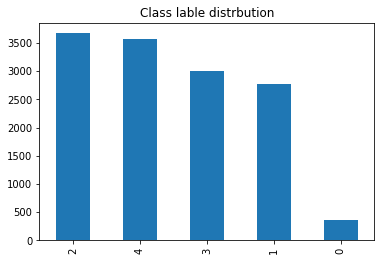

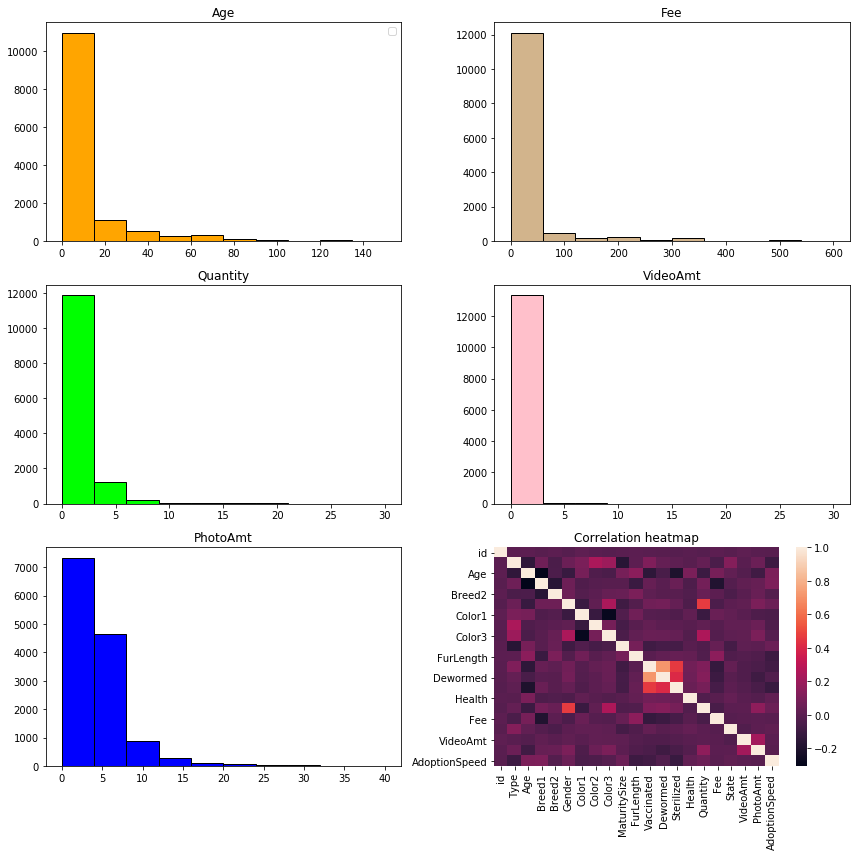

trainX  10708
before one hot enc test x 2677
before one hot enc test x 2677
AFTER one hot enc test x 2677
in one hot enc test y 2677
['005afe792' 'fe5dc391c' 'cca4ba626' ... '2dc54e9fd' '4f10d4a75'
 'e625fc4f4']
test_X  2677
testPet_ID  2677
in img test  (2677, 32, 32, 3)
Type_1        uint8
Type_2        uint8
Breed1_0      uint8
Breed1_1      uint8
Breed1_3      uint8
              ...  
Breed2_111    int64
Breed2_115    int64
Breed2_182    int64
Breed2_203    int64
Breed2_260    int64
Length: 346, dtype: object
AdoptionSpeed_0    uint8
AdoptionSpeed_1    uint8
AdoptionSpeed_2    uint8
AdoptionSpeed_3    uint8
AdoptionSpeed_4    uint8
dtype: object
[array([[[[230., 221., 224.],
         [231., 222., 225.],
         [236., 219., 227.],
         ...,
         [228., 216., 218.],
         [225., 213., 215.],
         [222., 207., 212.]],

        [[233., 221., 225.],
         [234., 222., 226.],
         [231., 218., 228.],
         ...,
         [229., 214., 217.],
         [230., 215.

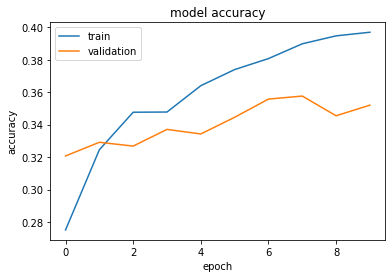

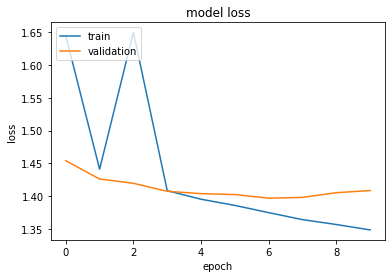

In [13]:

path_to_data = "dataset.csv"
images_path="images"
data = pd.read_csv(path_to_data)

# Data visualization 
data = visualize(path_to_data)

# Split the dataset into training and testing sets following 80/20 partition
train_X, test_X, train_y, test_Y = split(data) 



# Preprocess categorical and continuous data
pr_train_X, pr_test_x,pr_train_y, pr_test_y = preprocess_data(train_X, test_X, train_y, test_Y)
pr_train_X.drop('PetID', inplace=True, axis=1)
pr_test_x.drop('PetID', inplace=True, axis=1)


# Preprocess images
train_images, test_images = preprocess_image(data, images_path)

cnn_model = create_cnn()
# Train MLP model

mlp_model = train_mlp([pr_train_X.shape[1]])

whole_model = whole_network_structure(mlp_model,cnn_model)

print(pr_train_X.dtypes)
print(pr_train_y.dtypes)

y_train=np.asarray(pr_train_y).astype(np.float)
X_train=np.asarray(pr_train_X).astype(np.float)
train_all([train_images,pr_train_X],pr_train_y,whole_model)









In [14]:
print(pr_train_X)
print(pr_test_x)



       Type_1  Type_2  Breed1_0  Breed1_1  Breed1_3  Breed1_5  Breed1_10  \
0           0       1         0         0         0         0          0   
1           1       0         0         0         0         0          0   
2           1       0         0         0         0         0          0   
3           1       0         0         0         0         0          0   
4           0       1         0         0         0         0          0   
...       ...     ...       ...       ...       ...       ...        ...   
10703       1       0         0         0         0         0          0   
10704       0       1         0         0         0         0          0   
10705       0       1         0         0         0         0          0   
10706       1       0         0         0         0         0          0   
10707       1       0         0         0         0         0          0   

       Breed1_11  Breed1_15  Breed1_16  ...  Breed1_99  Breed1_123  \
0              0 

In [17]:

predict_evalute(test_images,pr_test_x,pr_test_y,whole_model)

[[0.         0.         1.         0.         0.        ]
 [0.03644672 0.1980806  0.3099951  0.34814218 0.10733537]
 [0.03885569 0.24132352 0.31055078 0.29261747 0.11665259]
 ...
 [0.03233841 0.13478412 0.27073193 0.30301985 0.2591256 ]
 [0.02621905 0.20099734 0.33076862 0.34359157 0.09842339]
 [0.0346357  0.13548252 0.25409356 0.27379018 0.30199805]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


ValueError: multilabel-indicator is not supported